#Duppala Vijaya Raghava

#CB.EN.U4CSE20218

# PartA

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, plot_confusion_matrix, plot_roc_curve

In [2]:
data = [5, 15, 25, 35, 45, 55]
df = pd.DataFrame(data, columns=['x'])
df

,x
0,5
1,15
2,25
3,35
4,45
5,55


In [3]:
data = [5, 20, 14, 32, 22, 38]
df1 = pd.DataFrame(data, columns=['y'])
df1

,y
0,5
1,20
2,14
3,32
4,22
5,38


In [4]:
data=[df,df1]
df2=pd.concat(data,axis=1)
df2

,x,y
0,5,5
1,15,20
2,25,14
3,35,32
4,45,22
5,55,38


1. Draw a scatter plot of x versus y, assess the correlation between each and sales and draw Correlation plot.

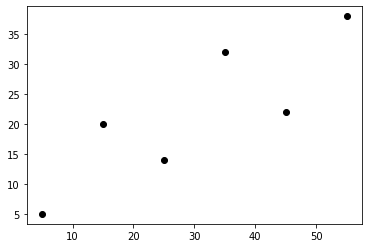

In [5]:
import matplotlib.pyplot as plt
plt.scatter(df2['x'],df2['y'],color='Black')

In [6]:
df2.corr()

,x,y
x,1.000000,0.846094
y,0.846094,1.000000


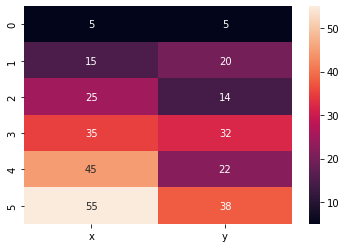

In [7]:
sns.heatmap(data=df2,annot=True)

2. Develop a Linear Regression model

In [8]:
x=df2[["x"]]
y=df2["y"]

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,train_size=0.75)

In [10]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)
Y_pred=lr.predict(X_test)

In [11]:
m=lr.coef_
c=lr.intercept_
print("Slope",m[0])
print("Intercept",c)

Slope 0.5457142857142854
Intercept 3.2428571428571527


In [12]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error: 6.657142857142861
Mean Squared Error: 47.98204081632655
Root Mean Squared Error: 6.926907016578651


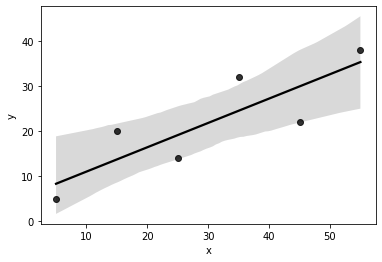

In [13]:
sns.regplot(data=df2,x="x",y="y",color='Black')

3. With the regression line so developed, for x = 10 predict the y value

In [14]:
Y_pred=lr.predict([[10]])
Y_pred

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([8.7])

7.9 is predicted when x is 10

4) Employ statsmodels.api and run an OLS regressor on the data and comment on the R-square value

In [15]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [16]:
linear_model = ols('x ~ y',
                   data=df2).fit()

In [17]:
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      x   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     10.08
Date:                Mon, 09 Jan 2023   Prob (F-statistic):             0.0337
Time:                        11:00:11   Log-Likelihood:                -21.765
No. Observations:                   6   AIC:                             47.53
Df Residuals:                       4   BIC:                             47.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0556     10.190      0.104      0.9

/usr/local/lib/python3.8/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


5) Plot the residues. Offer your comments on the residue pattern and comment on its heteroscedasticity

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


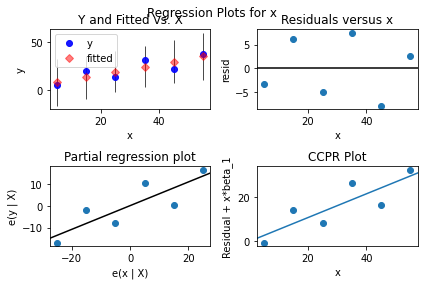

<Figure size 2160x1152 with 0 Axes>

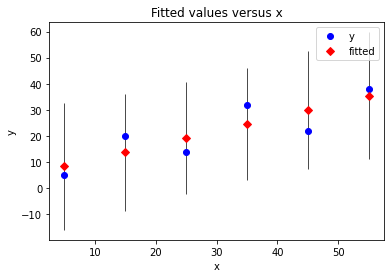

In [18]:
import statsmodels.api as sm
N = sm.add_constant(df2[["x"]])
model = sm.OLS(df2["y"], N).fit()
sm.graphics.plot_regress_exog(model, "x")
plt.figure(figsize=(30, 16))
plt.show()
sm.graphics.plot_fit(model, "x")
plt.show()

Part B

1) Import the data set, describe the data and save it on your hard drive. Split the data for training and testing in the ratio of 80:20.

In [19]:
df = pd.read_csv('/content/Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [21]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [22]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [23]:
from sklearn import preprocessing
  
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['Gender']= label_encoder.fit_transform(df['Gender'])
  
df['Gender'].unique()

array([1, 0])

In [24]:
df.rename(columns = {'User ID':'user'},inplace=True)
df.rename(columns = {'EstimatedSalary':'salary'}, inplace = True)
df

,user,Gender,Age,salary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [25]:
features = ['user', 'Gender', 'Age', 'salary']
X = df[features] 
y = df.Purchased

1. Import the data set, describe the data and save it on your hard drive. Split the data for training and testing in the ratio of 80:20.

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

2. Employ the standard scalar library and rescale the distribution of values so that the mean of observed values is 0 and the standard deviation is 1.

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

3. Develop a KNN classifier model and predict for the test data.

In [28]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train);

In [29]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0])

4. Draw up a confusion matrix.


In [30]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[56  2]
 [ 2 20]]


In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        58
           1       0.91      0.91      0.91        22

    accuracy                           0.95        80
   macro avg       0.94      0.94      0.94        80
weighted avg       0.95      0.95      0.95        80



5. Identify an optimum k value based on minimum mean errors (consider a range of 10). Draw a corresponding graph between Mean error and k-value.

In [32]:
error = []

# Calculating error for K values between 1 and 20
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

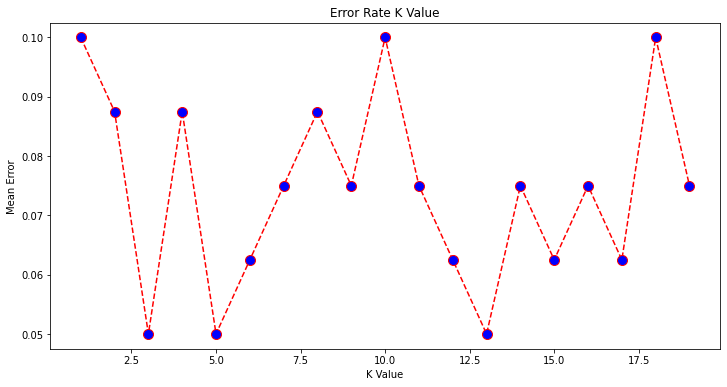

In [33]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')